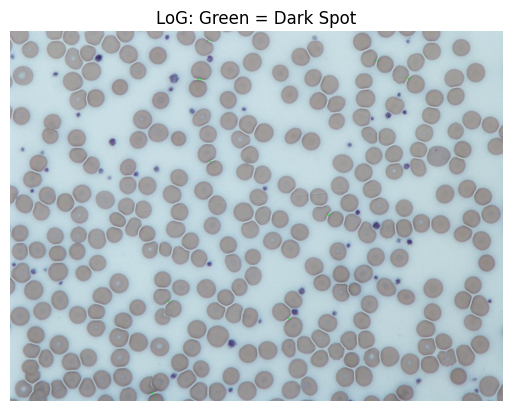

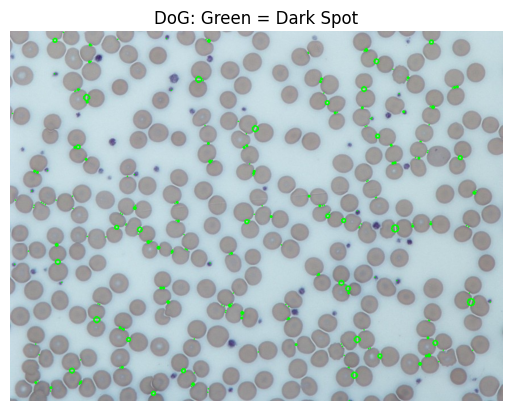

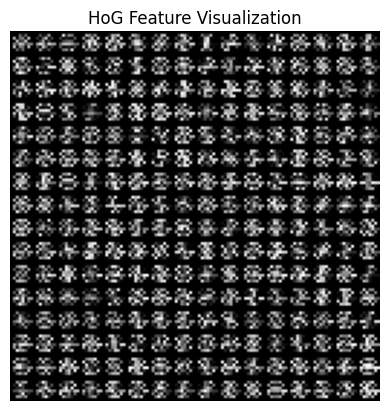

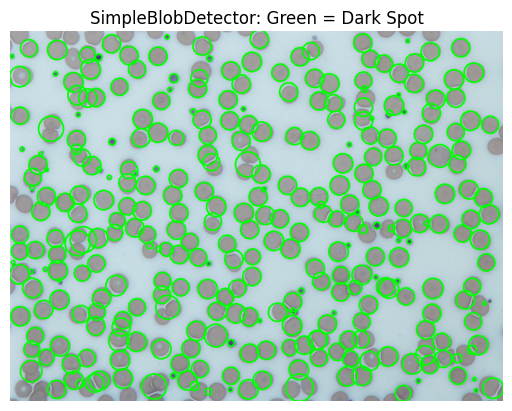

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load original image in color
image = cv2.imread('Picture1.jpg')
original = image.copy()


### --- 1. LoG (Laplacian of Gaussian) ---
blurred = cv2.GaussianBlur(image, (5, 5), 0)
gray_blur = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
log = cv2.Laplacian(gray_blur, cv2.CV_64F)
log_disp = np.uint8(np.absolute(log))

_, thresh_log = cv2.threshold(log_disp, 30, 255, cv2.THRESH_BINARY)
contours_log, _ = cv2.findContours(thresh_log, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

log_result = original.copy()
for cnt in contours_log:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    cv2.circle(log_result, (int(x), int(y)), int(radius), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(log_result, cv2.COLOR_BGR2RGB))
plt.title("LoG: Green = Dark Spot")
plt.axis('off')
plt.show()


### --- 2. DoG (Difference of Gaussian) ---
blur1 = cv2.GaussianBlur(image, (5, 5), 1)
blur2 = cv2.GaussianBlur(image, (5, 5), 2)
dog = cv2.absdiff(blur1, blur2)
gray_dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)

_, thresh_dog = cv2.threshold(gray_dog, 10, 255, cv2.THRESH_BINARY)
contours_dog, _ = cv2.findContours(thresh_dog, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

dog_result = original.copy()
for cnt in contours_dog:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    cv2.circle(dog_result, (int(x), int(y)), int(radius), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(dog_result, cv2.COLOR_BGR2RGB))
plt.title("DoG: Green = Dark Spot")
plt.axis('off')
plt.show()


### --- 3. HoG Visualization
resized = cv2.resize(image, (128, 128))
gray_resized = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

hog_features, hog_image = hog(gray_resized, visualize=True)
hog_image = np.uint8(hog_image * 255)
hog_image = cv2.cvtColor(hog_image, cv2.COLOR_GRAY2BGR)

plt.imshow(hog_image)
plt.title("HoG Feature Visualization")
plt.axis('off')
plt.show()


### --- 4. SimpleBlobDetector for Dark Spots ---
params = cv2.SimpleBlobDetector_Params()
params.filterByColor = True
params.blobColor = 0  # Detect dark blobs

params.filterByArea = True
params.minArea = 30

params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
keypoints = detector.detect(gray)

blob_result = image.copy()
for kp in keypoints:
    x, y = int(kp.pt[0]), int(kp.pt[1])
    size = int(kp.size)
    cv2.circle(blob_result, (x, y), size // 2, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(blob_result, cv2.COLOR_BGR2RGB))
plt.title("SimpleBlobDetector: Green = Dark Spot")
plt.axis('off')
plt.show()


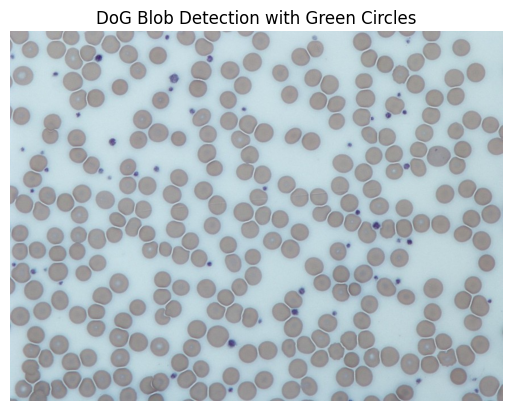

In [ ]:
# Apply Gaussian blurs
blur1 = cv2.GaussianBlur(image, (5, 5), 1)
blur2 = cv2.GaussianBlur(image, (5, 5), 2)

# Difference of Gaussians
dog = cv2.absdiff(blur1, blur2)

# Convert to grayscale for contour detection
gray_dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)

# Threshold to extract dark blobs
_, dog_thresh = cv2.threshold(gray_dog, 15, 255, cv2.THRESH_BINARY)

# Find contours (now on binary single-channel image)
contours, _ = cv2.findContours(dog_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw green circles on blobs
dog_marked = image.copy()
for cnt in contours:
    if cv2.contourArea(cnt) > 50:
        (x, y), radius = cv2.minEnclosingCircle(cnt)
        cv2.circle(dog_marked, (int(x), int(y)), int(radius), (0, 255, 0), 2)

# Show result
plt.imshow(cv2.cvtColor(dog_marked, cv2.COLOR_BGR2RGB))
plt.title('DoG Blob Detection with Green Circles')
plt.axis('off')
plt.show()


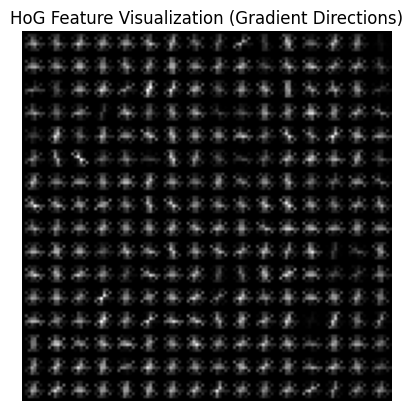

In [ ]:
from skimage.feature import hog

# Resize image for HoG
resized_img = cv2.resize(image, (128, 128))

# Convert to grayscale (HOG expects 2D)
gray_resized = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

# Extract HOG features and visualization
hog_features, hog_image = hog(gray_resized, visualize=True)

# Show HOG visualization
plt.imshow(hog_image, cmap='gray')
plt.title('HoG Feature Visualization (Gradient Directions)')
plt.axis('off')
plt.show()


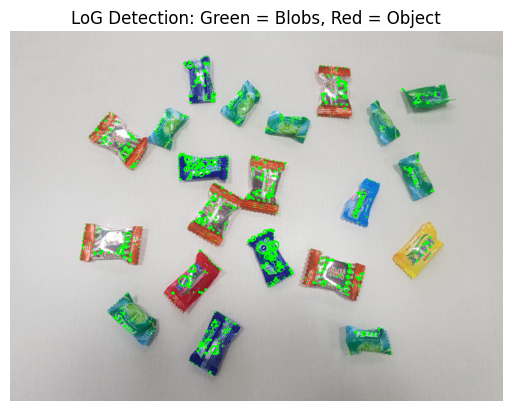

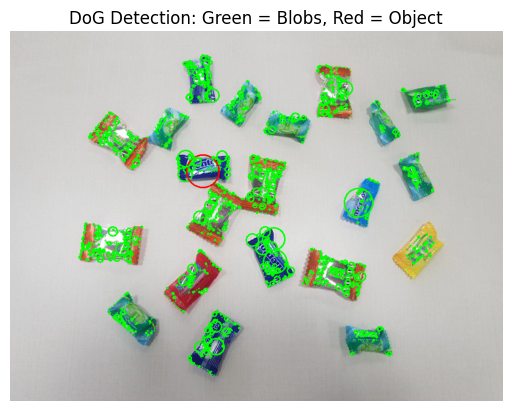

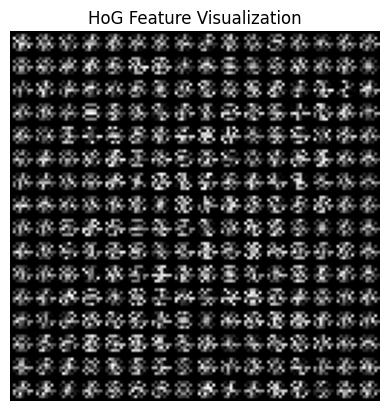

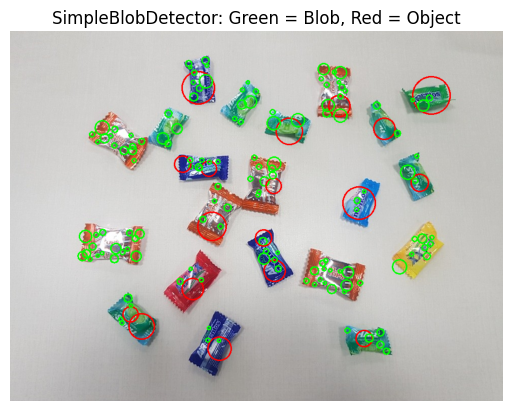

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load original image in color
image = cv2.imread('Picture2.jpg')
original = image.copy()

### --- 1. LoG with Green & Red Circles ---
blurred = cv2.GaussianBlur(image, (5, 5), 0)
gray_blur = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
log = cv2.Laplacian(gray_blur, cv2.CV_64F)
log_disp = np.uint8(np.absolute(log))

_, thresh_log = cv2.threshold(log_disp, 30, 255, cv2.THRESH_BINARY)
contours_log, _ = cv2.findContours(thresh_log, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

log_result = original.copy()
for cnt in contours_log:
    area = cv2.contourArea(cnt)
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    color = (0, 255, 0) if area < 500 else (0, 0, 255)  # Green for small blobs, Red for big
    cv2.circle(log_result, (int(x), int(y)), int(radius), color, 2)

plt.imshow(cv2.cvtColor(log_result, cv2.COLOR_BGR2RGB))
plt.title("LoG Detection: Green = Blobs, Red = Object")
plt.axis('off')
plt.show()


### --- 2. DoG with Green & Red Circles ---
blur1 = cv2.GaussianBlur(image, (5, 5), 1)
blur2 = cv2.GaussianBlur(image, (5, 5), 2)
dog = cv2.absdiff(blur1, blur2)
gray_dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)

_, thresh_dog = cv2.threshold(gray_dog, 10, 255, cv2.THRESH_BINARY)
contours_dog, _ = cv2.findContours(thresh_dog, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

dog_result = original.copy()
for cnt in contours_dog:
    area = cv2.contourArea(cnt)
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    color = (0, 255, 0) if area < 500 else (0, 0, 255)
    cv2.circle(dog_result, (int(x), int(y)), int(radius), color, 2)

plt.imshow(cv2.cvtColor(dog_result, cv2.COLOR_BGR2RGB))
plt.title("DoG Detection: Green = Blobs, Red = Object")
plt.axis('off')
plt.show()


### --- 3. HoG Visualization (No Circles) ---
resized = cv2.resize(image, (128, 128))
gray_resized = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

hog_features, hog_image = hog(gray_resized, visualize=True)
hog_image = np.uint8(hog_image * 255)
hog_image = cv2.cvtColor(hog_image, cv2.COLOR_GRAY2BGR)

plt.imshow(hog_image)
plt.title("HoG Feature Visualization")
plt.axis('off')
plt.show()


### --- 4. SimpleBlobDetector with Green & Red Circles ---
params = cv2.SimpleBlobDetector_Params()
params.filterByColor = True
params.blobColor = 0  # Detect dark blobs

params.filterByArea = True
params.minArea = 30

params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
keypoints = detector.detect(gray)

blob_result = image.copy()
for kp in keypoints:
    x, y = int(kp.pt[0]), int(kp.pt[1])
    size = int(kp.size)
    color = (0, 255, 0) if size < 30 else (0, 0, 255)
    cv2.circle(blob_result, (x, y), size // 2, color, 2)

plt.imshow(cv2.cvtColor(blob_result, cv2.COLOR_BGR2RGB))
plt.title("SimpleBlobDetector: Green = Blob, Red = Object")
plt.axis('off')
plt.show()


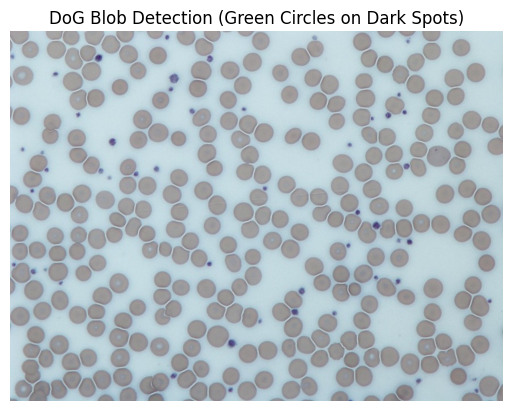

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load color image
image = cv2.imread('Picture1.jpg')

# Apply Gaussian blurs
blur1 = cv2.GaussianBlur(image, (5, 5), 1)
blur2 = cv2.GaussianBlur(image, (5, 5), 2)

# Difference of Gaussians
dog = cv2.absdiff(blur1, blur2)  # safer than blur1 - blur2

# Convert to grayscale
gray_dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)

# Apply threshold to get binary image
_, dog_thresh = cv2.threshold(gray_dog, 15, 255, cv2.THRESH_BINARY)

# Find contours from single-channel thresholded image
contours, _ = cv2.findContours(dog_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy original image to mark
dog_marked = image.copy()

# Draw green circles around blobs
for cnt in contours:
    if cv2.contourArea(cnt) > 50:
        (x, y), radius = cv2.minEnclosingCircle(cnt)
        cv2.circle(dog_marked, (int(x), int(y)), int(radius), (0, 255, 0), 2)

# Show result
plt.imshow(cv2.cvtColor(dog_marked, cv2.COLOR_BGR2RGB))
plt.title('DoG Blob Detection (Green Circles on Dark Spots)')
plt.axis('off')
plt.show()


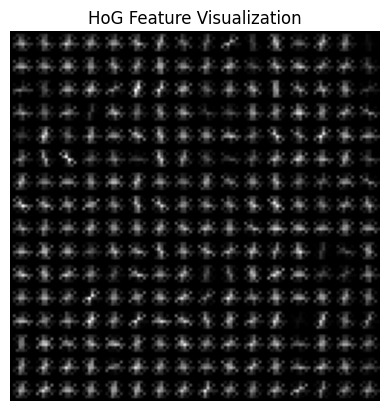

In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2

# Resize image for HoG
resized_img = cv2.resize(image, (128, 128))

# Convert to grayscale first
gray_resized = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

# Extract HOG features
hog_features, hog_image = hog(gray_resized, visualize=True)

# Show HoG image
plt.imshow(hog_image, cmap='gray')
plt.title('HoG Feature Visualization')
plt.axis('off')
plt.show()


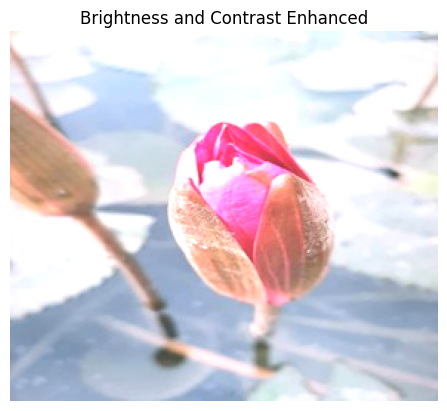

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('Picture3.jpg')  # replace with your actual image
bright_contrast = cv2.convertScaleAbs(image, alpha=1.2, beta=30)

plt.imshow(cv2.cvtColor(bright_contrast, cv2.COLOR_BGR2RGB))
plt.title('Brightness and Contrast Enhanced')
plt.axis('off')
plt.show()


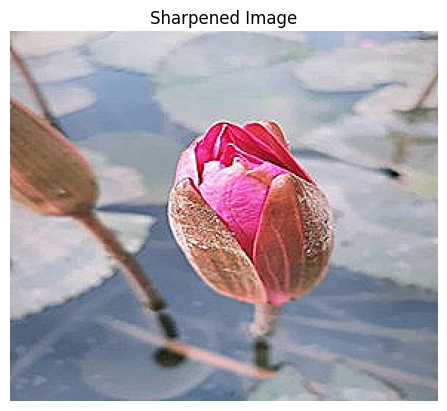

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(image, -1, kernel)

plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')
plt.show()


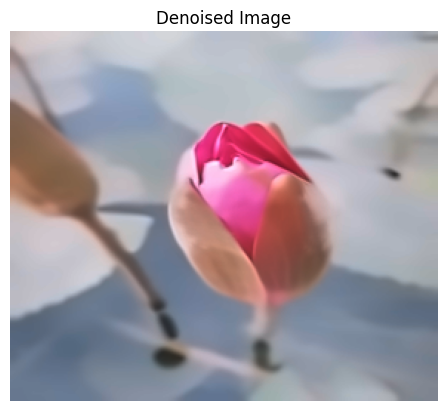

In [ ]:
denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

plt.imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image')
plt.axis('off')
plt.show()


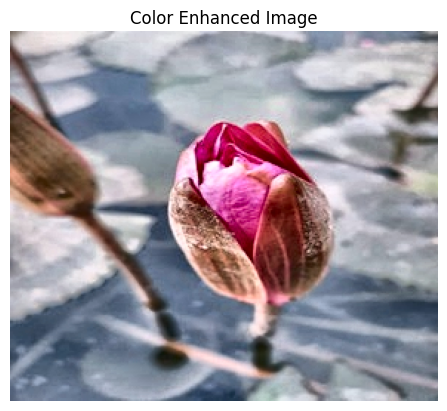

In [ ]:
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
merged = cv2.merge((cl,a,b))
color_enhanced = cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

plt.imshow(cv2.cvtColor(color_enhanced, cv2.COLOR_BGR2RGB))
plt.title('Color Enhanced Image')
plt.axis('off')
plt.show()


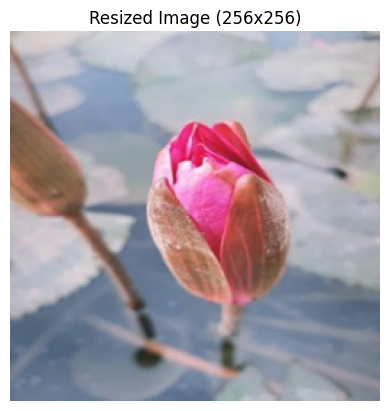

In [ ]:
resized = cv2.resize(image, (256, 256))

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('Resized Image (256x256)')
plt.axis('off')
plt.show()


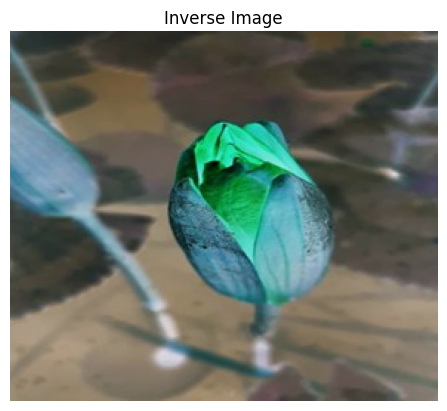

In [ ]:
inverse_image = 255 - image

plt.imshow(cv2.cvtColor(inverse_image, cv2.COLOR_BGR2RGB))
plt.title('Inverse Image')
plt.axis('off')
plt.show()


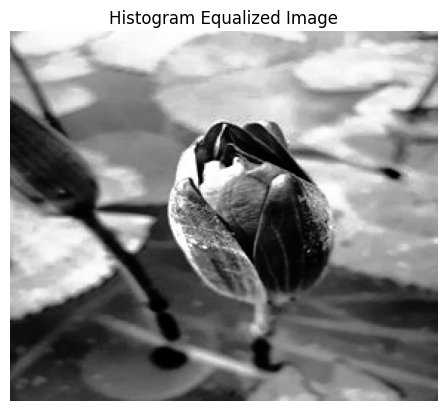

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)

plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # AlexNet/VGG16 input size
    transforms.ToTensor(),
])

# Load CIFAR-100
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 169M/169M [00:02<00:00, 80.0MB/s]


In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=100):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

alexnet = AlexNet().to(device)


In [ ]:
from torchvision.models import vgg16

vgg = vgg16(pretrained=True)
vgg.classifier[6] = nn.Linear(4096, 100)  # Change for CIFAR-100
vgg = vgg.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 84.3MB/s]


In [ ]:
def train_model(model, optimizer, criterion, loader):
    model.train()
    for epoch in range(10):
        running_loss = 0.0
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/10], Loss: {running_loss:.4f}')


In [ ]:
def evaluate_model(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_alex = optim.Adam(alexnet.parameters(), lr=0.001)

print("Training AlexNet...")
train_model(alexnet, optimizer_alex, criterion, trainloader)
evaluate_model(alexnet, testloader)


Training AlexNet...


In [ ]:
optimizer_vgg = optim.Adam(vgg.parameters(), lr=0.001)

print("Training VGG16...")
train_model(vgg, optimizer_vgg, criterion, trainloader)
evaluate_model(vgg, testloader)
